<a href="https://colab.research.google.com/github/kdemertzis/Earthquakes/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install pycaret
#!pip install shap

In [3]:
"""
    Import library
"""
##-- PyCaret
import pycaret
from pycaret.regression import *
##-- Pandas
import pandas as pd
from pandas import Series, DataFrame
##-- Scikit-learn
import sklearn

In [ ]:
#data = pd.read_csv('/content/park_1st_shock.csv')

In [8]:
url = 'https://raw.githubusercontent.com/kdemertzis/Earthquakes/main/Di_1%2B2_data.csv'
# load the dataset
df = pd.read_csv(url)

In [9]:
df.head()

,First_Shock,pga,pgv,pgd,AriasIntensity,CAV,pgaviapgv,ArayaSaragoniIntensity,StrongMotionDurationATB,StrongMotionDurationROG,StrongMotionDurationBolt,P90,arms,characteristicIntensity,intensityFajfarVidicFischinger,intensityRiddelGarcia,spectralDisplacement,spectralAcceleration,spectralVelocity,HousnerIntensity,KapposIntensity,spectralEnergy,DiPasqualeCakmak1stOrder
0,0.084179,75.0229,6.4275,1.20400,7.1854,197.2279,11.6722,0.087298,9.545,13.405,1.355,0.67812,20.5846,288.5370,11.2976,2.5540,1.29690,31.8634,6.6815,20.4190,3.3915,0.69106,0.16778
1,0.077537,65.6548,4.5159,0.80762,4.8383,165.5788,14.5385,0.095452,9.855,13.590,0.000,0.44237,16.6255,212.8087,8.0013,1.7315,0.74783,18.7187,5.5404,14.3575,1.8375,0.30929,0.15986
2,0.010965,425.8622,44.1118,14.16000,201.0895,927.9192,9.6542,2.546900,5.490,6.775,8.565,32.99270,143.6079,4032.3090,67.5223,24.9796,20.67990,509.3343,108.0682,139.6949,45.5454,126.27930,0.43976
3,0.019354,384.6959,39.4121,10.51170,192.2265,891.3812,9.7608,2.001500,5.670,6.915,9.365,30.50630,138.0824,3863.6594,60.8171,18.7442,18.12130,446.2971,109.9585,137.9900,43.1243,50.18910,0.33354
4,0.079939,418.6162,52.2304,14.12860,245.7560,1232.9147,8.0148,4.590700,9.640,11.100,11.060,22.97750,119.7605,4069.2003,92.0329,30.0693,26.18980,645.2242,150.3818,234.4002,66.2425,86.75690,0.29680


In [ ]:
#reg = setup(data = data, target=data.columns[-1], session_id=99, html=False, silent=True, verbose=False)

In [10]:
reg = setup(data = df, target=df.columns[-1], session_id=99, html=False, silent=True)

Setup Succesfully Completed!


,Description,Value
0,session_id,4032
1,Target,DiPasqualeCakmak1stOrder
2,Original Data,"(80, 23)"
3,Missing Values,False
4,Numeric Features,22
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(55, 20)"


In [11]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0998,0.0287,0.1407,-0.4183,0.0916,1.9943,0.287


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lasso,Lasso Regression,0.1324,0.0248,0.1538,-0.1322,0.1219,13.3530,0.015
lr,Linear Regression,0.0998,0.0287,0.1407,-0.4183,0.0916,1.9943,0.287


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lasso,Lasso Regression,0.1324,0.0248,0.1538,-0.1322,0.1219,13.3530,0.015
lr,Linear Regression,0.0998,0.0287,0.1407,-0.4183,0.0916,1.9943,0.287
ridge,Ridge Regression,0.1694,0.0848,0.2467,-2.8084,0.1310,7.4388,0.013


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
en,Elastic Net,0.1299,0.0244,0.1524,-0.1215,0.1206,13.2087,0.015
lasso,Lasso Regression,0.1324,0.0248,0.1538,-0.1322,0.1219,13.3530,0.015
lr,Linear Regression,0.0998,0.0287,0.1407,-0.4183,0.0916,1.9943,0.287
ridge,Ridge Regression,0.1694,0.0848,0.2467,-2.8084,0.1310,7.4388,0.013


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
en,Elastic Net,0.1299,0.0244,0.1524,-0.1215,0.1206,13.2087,0.015
lasso,Lasso Regression,0.1324,0.0248,0.1538,-0.1322,0.1219,13.3530,0.015
lr,Linear Regression,0.0998,0.0287,0.1407,-0.4183,0.0916,1.9943,0.287
ridge,Ridge Regression,0.1694,0.0848,0.2467,-2.8084,0.1310,7.4388,0.013
lar,Least Angle Regression,1.0549,7.2491,1.5981,-329.6414,0.4541,11.6228,0.017


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
en,Elastic Net,0.1299,0.0244,0.1524,-0.1215,0.1206,13.2087,0.015
lasso,Lasso Regression,0.1324,0.0248,0.1538,-0.1322,0.1219,13.3530,0.015
llar,Lasso Least Angle Regression,0.1460,0.0293,0.1684,-0.3314,0.1339,15.5830,0.012
lr,Linear Regression,0.0998,0.0287,0.1407,-0.4183,0.0916,1.9943,0.287
ridge,Ridge Regression,0.1694,0.0848,0.2467,-2.8084,0.1310,7.4388,0.013
lar,Least Angle Regression,1.0549,7.2491,1.5981,-329.6414,0.4541,11.6228,0.017


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,0.0530,0.0053,0.0666,0.6889,0.0523,2.4302,0.013
en,Elastic Net,0.1299,0.0244,0.1524,-0.1215,0.1206,13.2087,0.015
lasso,Lasso Regression,0.1324,0.0248,0.1538,-0.1322,0.1219,13.3530,0.015
llar,Lasso Least Angle Regression,0.1460,0.0293,0.1684,-0.3314,0.1339,15.5830,0.012
lr,Linear Regression,0.0998,0.0287,0.1407,-0.4183,0.0916,1.9943,0.287
ridge,Ridge Regression,0.1694,0.0848,0.2467,-2.8084,0.1310,7.4388,0.013
lar,Least Angle Regression,1.0549,7.2491,1.5981,-329.6414,0.4541,11.6228,0.017


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,0.0530,0.0053,0.0666,0.6889,0.0523,2.4302,0.013
en,Elastic Net,0.1299,0.0244,0.1524,-0.1215,0.1206,13.2087,0.015
lasso,Lasso Regression,0.1324,0.0248,0.1538,-0.1322,0.1219,13.3530,0.015
llar,Lasso Least Angle Regression,0.1460,0.0293,0.1684,-0.3314,0.1339,15.5830,0.012
lr,Linear Regression,0.0998,0.0287,0.1407,-0.4183,0.0916,1.9943,0.287
br,Bayesian Ridge,0.1127,0.0376,0.1601,-0.7661,0.0934,3.1274,0.014
ridge,Ridge Regression,0.1694,0.0848,0.2467,-2.8084,0.1310,7.4388,0.013
lar,Least Angle Regression,1.0549,7.2491,1.5981,-329.6414,0.4541,11.6228,0.017


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,0.0530,0.0053,0.0666,0.6889,0.0523,2.4302,0.013
en,Elastic Net,0.1299,0.0244,0.1524,-0.1215,0.1206,13.2087,0.015
lasso,Lasso Regression,0.1324,0.0248,0.1538,-0.1322,0.1219,13.3530,0.015
llar,Lasso Least Angle Regression,0.1460,0.0293,0.1684,-0.3314,0.1339,15.5830,0.012
lr,Linear Regression,0.0998,0.0287,0.1407,-0.4183,0.0916,1.9943,0.287
br,Bayesian Ridge,0.1127,0.0376,0.1601,-0.7661,0.0934,3.1274,0.014
ridge,Ridge Regression,0.1694,0.0848,0.2467,-2.8084,0.1310,7.4388,0.013
par,Passive Aggressive Regressor,0.5237,0.9030,0.7949,-45.2931,0.3061,9.9777,0.015
lar,Least Angle Regression,1.0549,7.2491,1.5981,-329.6414,0.4541,11.6228,0.017


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,0.0530,0.0053,0.0666,0.6889,0.0523,2.4302,0.013
en,Elastic Net,0.1299,0.0244,0.1524,-0.1215,0.1206,13.2087,0.015
lasso,Lasso Regression,0.1324,0.0248,0.1538,-0.1322,0.1219,13.3530,0.015
llar,Lasso Least Angle Regression,0.1460,0.0293,0.1684,-0.3314,0.1339,15.5830,0.012
lr,Linear Regression,0.0998,0.0287,0.1407,-0.4183,0.0916,1.9943,0.287
br,Bayesian Ridge,0.1127,0.0376,0.1601,-0.7661,0.0934,3.1274,0.014
ridge,Ridge Regression,0.1694,0.0848,0.2467,-2.8084,0.1310,7.4388,0.013
huber,Huber Regressor,0.4906,0.7339,0.7271,-28.4413,0.3443,36.0119,0.035
par,Passive Aggressive Regressor,0.5237,0.9030,0.7949,-45.2931,0.3061,9.9777,0.015
lar,Least Angle Regression,1.0549,7.2491,1.5981,-329.6414,0.4541,11.6228,0.017


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,0.0530,0.0053,0.0666,0.6889,0.0523,2.4302,0.013
en,Elastic Net,0.1299,0.0244,0.1524,-0.1215,0.1206,13.2087,0.015
lasso,Lasso Regression,0.1324,0.0248,0.1538,-0.1322,0.1219,13.3530,0.015
knn,K Neighbors Regressor,0.1373,0.0280,0.1615,-0.1724,0.1289,10.5882,0.063
llar,Lasso Least Angle Regression,0.1460,0.0293,0.1684,-0.3314,0.1339,15.5830,0.012
lr,Linear Regression,0.0998,0.0287,0.1407,-0.4183,0.0916,1.9943,0.287
br,Bayesian Ridge,0.1127,0.0376,0.1601,-0.7661,0.0934,3.1274,0.014
ridge,Ridge Regression,0.1694,0.0848,0.2467,-2.8084,0.1310,7.4388,0.013
huber,Huber Regressor,0.4906,0.7339,0.7271,-28.4413,0.3443,36.0119,0.035
par,Passive Aggressive Regressor,0.5237,0.9030,0.7949,-45.2931,0.3061,9.9777,0.015


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,0.0530,0.0053,0.0666,0.6889,0.0523,2.4302,0.013
dt,Decision Tree Regressor,0.0616,0.0074,0.0792,0.5752,0.0612,1.1969,0.017
en,Elastic Net,0.1299,0.0244,0.1524,-0.1215,0.1206,13.2087,0.015
lasso,Lasso Regression,0.1324,0.0248,0.1538,-0.1322,0.1219,13.3530,0.015
knn,K Neighbors Regressor,0.1373,0.0280,0.1615,-0.1724,0.1289,10.5882,0.063
llar,Lasso Least Angle Regression,0.1460,0.0293,0.1684,-0.3314,0.1339,15.5830,0.012
lr,Linear Regression,0.0998,0.0287,0.1407,-0.4183,0.0916,1.9943,0.287
br,Bayesian Ridge,0.1127,0.0376,0.1601,-0.7661,0.0934,3.1274,0.014
ridge,Ridge Regression,0.1694,0.0848,0.2467,-2.8084,0.1310,7.4388,0.013
huber,Huber Regressor,0.4906,0.7339,0.7271,-28.4413,0.3443,36.0119,0.035


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.0522,0.0052,0.0679,0.7185,0.0526,1.5731,0.410
omp,Orthogonal Matching Pursuit,0.0530,0.0053,0.0666,0.6889,0.0523,2.4302,0.013
dt,Decision Tree Regressor,0.0616,0.0074,0.0792,0.5752,0.0612,1.1969,0.017
en,Elastic Net,0.1299,0.0244,0.1524,-0.1215,0.1206,13.2087,0.015
lasso,Lasso Regression,0.1324,0.0248,0.1538,-0.1322,0.1219,13.3530,0.015
knn,K Neighbors Regressor,0.1373,0.0280,0.1615,-0.1724,0.1289,10.5882,0.063
llar,Lasso Least Angle Regression,0.1460,0.0293,0.1684,-0.3314,0.1339,15.5830,0.012
lr,Linear Regression,0.0998,0.0287,0.1407,-0.4183,0.0916,1.9943,0.287
br,Bayesian Ridge,0.1127,0.0376,0.1601,-0.7661,0.0934,3.1274,0.014
ridge,Ridge Regression,0.1694,0.0848,0.2467,-2.8084,0.1310,7.4388,0.013


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.0533,0.0049,0.0668,0.7370,0.0514,0.7878,0.372
rf,Random Forest Regressor,0.0522,0.0052,0.0679,0.7185,0.0526,1.5731,0.410
omp,Orthogonal Matching Pursuit,0.0530,0.0053,0.0666,0.6889,0.0523,2.4302,0.013
dt,Decision Tree Regressor,0.0616,0.0074,0.0792,0.5752,0.0612,1.1969,0.017
en,Elastic Net,0.1299,0.0244,0.1524,-0.1215,0.1206,13.2087,0.015
lasso,Lasso Regression,0.1324,0.0248,0.1538,-0.1322,0.1219,13.3530,0.015
knn,K Neighbors Regressor,0.1373,0.0280,0.1615,-0.1724,0.1289,10.5882,0.063
llar,Lasso Least Angle Regression,0.1460,0.0293,0.1684,-0.3314,0.1339,15.5830,0.012
lr,Linear Regression,0.0998,0.0287,0.1407,-0.4183,0.0916,1.9943,0.287
br,Bayesian Ridge,0.1127,0.0376,0.1601,-0.7661,0.0934,3.1274,0.014


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.0533,0.0049,0.0668,0.7370,0.0514,0.7878,0.372
rf,Random Forest Regressor,0.0522,0.0052,0.0679,0.7185,0.0526,1.5731,0.410
omp,Orthogonal Matching Pursuit,0.0530,0.0053,0.0666,0.6889,0.0523,2.4302,0.013
ada,AdaBoost Regressor,0.0588,0.0060,0.0734,0.6747,0.0574,3.5265,0.081
dt,Decision Tree Regressor,0.0616,0.0074,0.0792,0.5752,0.0612,1.1969,0.017
en,Elastic Net,0.1299,0.0244,0.1524,-0.1215,0.1206,13.2087,0.015
lasso,Lasso Regression,0.1324,0.0248,0.1538,-0.1322,0.1219,13.3530,0.015
knn,K Neighbors Regressor,0.1373,0.0280,0.1615,-0.1724,0.1289,10.5882,0.063
llar,Lasso Least Angle Regression,0.1460,0.0293,0.1684,-0.3314,0.1339,15.5830,0.012
lr,Linear Regression,0.0998,0.0287,0.1407,-0.4183,0.0916,1.9943,0.287


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.0533,0.0049,0.0668,0.7370,0.0514,0.7878,0.372
rf,Random Forest Regressor,0.0522,0.0052,0.0679,0.7185,0.0526,1.5731,0.410
gbr,Gradient Boosting Regressor,0.0497,0.0050,0.0659,0.7173,0.0508,1.7257,0.053
omp,Orthogonal Matching Pursuit,0.0530,0.0053,0.0666,0.6889,0.0523,2.4302,0.013
ada,AdaBoost Regressor,0.0588,0.0060,0.0734,0.6747,0.0574,3.5265,0.081
dt,Decision Tree Regressor,0.0616,0.0074,0.0792,0.5752,0.0612,1.1969,0.017
en,Elastic Net,0.1299,0.0244,0.1524,-0.1215,0.1206,13.2087,0.015
lasso,Lasso Regression,0.1324,0.0248,0.1538,-0.1322,0.1219,13.3530,0.015
knn,K Neighbors Regressor,0.1373,0.0280,0.1615,-0.1724,0.1289,10.5882,0.063
llar,Lasso Least Angle Regression,0.1460,0.0293,0.1684,-0.3314,0.1339,15.5830,0.012


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.0533,0.0049,0.0668,0.7370,0.0514,0.7878,0.372
rf,Random Forest Regressor,0.0522,0.0052,0.0679,0.7185,0.0526,1.5731,0.410
gbr,Gradient Boosting Regressor,0.0497,0.0050,0.0659,0.7173,0.0508,1.7257,0.053
omp,Orthogonal Matching Pursuit,0.0530,0.0053,0.0666,0.6889,0.0523,2.4302,0.013
ada,AdaBoost Regressor,0.0588,0.0060,0.0734,0.6747,0.0574,3.5265,0.081
dt,Decision Tree Regressor,0.0616,0.0074,0.0792,0.5752,0.0612,1.1969,0.017
lightgbm,Light Gradient Boosting Machine,0.0945,0.0154,0.1201,0.2702,0.0913,4.3583,0.066
en,Elastic Net,0.1299,0.0244,0.1524,-0.1215,0.1206,13.2087,0.015
lasso,Lasso Regression,0.1324,0.0248,0.1538,-0.1322,0.1219,13.3530,0.015
knn,K Neighbors Regressor,0.1373,0.0280,0.1615,-0.1724,0.1289,10.5882,0.063


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.0533,0.0049,0.0668,0.7370,0.0514,0.7878,0.372
rf,Random Forest Regressor,0.0522,0.0052,0.0679,0.7185,0.0526,1.5731,0.410
gbr,Gradient Boosting Regressor,0.0497,0.0050,0.0659,0.7173,0.0508,1.7257,0.053
omp,Orthogonal Matching Pursuit,0.0530,0.0053,0.0666,0.6889,0.0523,2.4302,0.013
ada,AdaBoost Regressor,0.0588,0.0060,0.0734,0.6747,0.0574,3.5265,0.081
dt,Decision Tree Regressor,0.0616,0.0074,0.0792,0.5752,0.0612,1.1969,0.017
lightgbm,Light Gradient Boosting Machine,0.0945,0.0154,0.1201,0.2702,0.0913,4.3583,0.066
en,Elastic Net,0.1299,0.0244,0.1524,-0.1215,0.1206,13.2087,0.015
lasso,Lasso Regression,0.1324,0.0248,0.1538,-0.1322,0.1219,13.3530,0.015
knn,K Neighbors Regressor,0.1373,0.0280,0.1615,-0.1724,0.1289,10.5882,0.063


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=4032, verbose=0, warm_start=False)

In [12]:
best = create_model("et", fold=10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0339,0.0015,0.0384,0.9490,0.0322,0.9281
1,0.0443,0.0025,0.0498,0.9477,0.0389,3.4704
2,0.0686,0.0075,0.0865,0.8203,0.0637,0.2379
3,0.0398,0.0032,0.0562,0.8519,0.0394,0.1268
4,0.0593,0.0075,0.0869,0.6882,0.0667,0.2043
5,0.0878,0.0101,0.1004,0.5291,0.0773,0.3990
6,0.0455,0.0023,0.0482,0.9066,0.0380,0.3284
7,0.0482,0.0046,0.0678,0.3672,0.0562,1.4176
8,0.0356,0.0026,0.0513,0.8550,0.0388,0.4534
9,0.0705,0.0068,0.0822,0.4547,0.0626,0.3120


In [13]:
tuned_model = tune_model(best)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   32.0s finished


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0521,0.0037,0.0608,0.8725,0.0546,3.9206
1,0.0820,0.0084,0.0918,0.8225,0.0715,21.5274
2,0.0855,0.0120,0.1097,0.7107,0.0771,0.3091
3,0.0287,0.0012,0.0342,0.9452,0.0242,0.0941
4,0.0892,0.0149,0.1220,0.3849,0.0936,0.3105
5,0.0980,0.0172,0.1313,0.1947,0.1010,0.3657
6,0.0357,0.0016,0.0404,0.9343,0.0343,0.3826
7,0.0625,0.0055,0.0742,0.2416,0.0659,32.0298
8,0.0581,0.0057,0.0755,0.6851,0.0632,6.9387
9,0.0622,0.0054,0.0732,0.5678,0.0565,0.2935


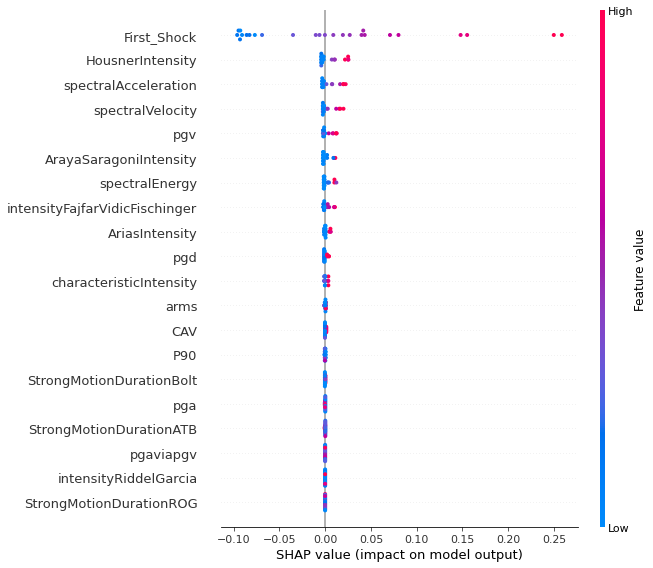

In [14]:
interpret_model(tuned_model)

In [15]:
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…